<a href="https://colab.research.google.com/github/1rd0/BekEnd_lab/blob/master/MLP_pytorch_dpo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №5

**Многослойный перцептрон в pytorch**

---

**Впишите в эту ячейку ваши ФИО, группу и вариант**.

ФИО:Рабдел Дмитрий Александрович

Группа:221-371

---

## Работа с тензорами

**Совет по работе**

Создавайте отдельные ячейки для ваших экспериментов. Пробуйте создавать небольшие тензоры и экспериментировать с ними, чтобы понять, как работает та или иная функция и какие размерности данных вам требуются.

Когда дойдете до цикла обучения сначала пробуйте работать с одной эпохой и ограниченным набором пакетов данных, чтобы меньше времени ожидать до обнаружения ошибки.

Создайте тензор a из `list(range(9))`.

In [ ]:
import torch
import torchvision ## Contains some utilities for working with the image data
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
#%matplotlib inline
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.nn.functional as F

a = torch.tensor(list(range(9)))
print(a)
print(a.size())
print(a.storage_offset())
print(a.stride())

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])
torch.Size([9])
0
(1,)


** **bold text**Каковы его размеры (`size`), сдвиг (`storage_offset`) и шаг (`stride`)?**

Ваш ответ:

**Создайте** новый тензор b размерностью 3 на 3, используя метод `view` на тензоре a.

In [ ]:
b = a.view(3, 3)
print(b)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


**Что делает view?**

Ваш ответ:

Создайте тензор c, который содержит только последнюю колонку тензора b, используя срезы.

In [ ]:
c = b[::, -1]
print(c)

tensor([2, 5, 8])


Измените последний элемент в тензоре c.

In [ ]:
c[-1] = 0

**Изменился ли при этом тензор a?**

Ваш ответ:

## Чтение данных и dataset

Из встроенных датасетов torchvision загрузите тестовую и обучающую выборки из MNIST, указав преобразование для изображений используя ToTensor().

In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_set = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_set = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Датасеты позволяют получить общее количество объектов с помощью функции `len`, также - объект с классом по индексу. В атрибуте `classes` хранятся ярлыки классов.

In [ ]:
train_samples_len = len(train_set)
test_samples_len = len(test_set)
image_shape = train_set.data.shape
classes_len = len(train_set.classes)
classes_labels = train_set.classes
print(train_samples_len,test_samples_len,image_shape,classes_len,classes_labels)

60000 10000 torch.Size([60000, 28, 28]) 10 ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


## Создание dataloader

> Indented block



Данные при обучении модели редко передаются по одному образцу или все разом, обычно образцы объединяются в пакеты (batches) и уже они передаются на вход модели.

Размер пакета (batch size) часто выбирается как $2^n$ (16, 32, 64, 128) и часто это зависит от доступной памяти.

Загрузчики данных будут использоваться при обучении и тестировании модели и когда все пакеты были перебраны в датасете, это считается одной эпохой обучения. Чтобы между эпохами модель на обучалась на одинаковых пакетах их перемешивают (shuffle).

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_loader = DataLoader(train_set, 32, shuffle=True)
test_loader = DataLoader(test_set, 32, shuffle=False)

#
# По аналогии создайте test_loader
# Подумайте нужно ли перемешивание данных при проверке

#Since Validation dataloader is used only for evaluating the model,
#there is no need to shuffle the images.

**Что означает число 32 в примере для train_loader?**

Ваш ответ:количество элиментов в одном батче


**Какая размерность будет у одного пакета данных?**

Ваш ответ:128

In [ ]:
for img, label in train_loader:
  print(img)

  print(label.shape)
  break


tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

## Создание модели

Ваша задача при инициализации MLP, создать несколько линейных слоев и функцию активации (например ReLU), которые будут использоваться при прямом проходе в модели. Перед входным слоем не забудьте использовать для изображений `.flatten()`. Чтобы вы могли использовать пакеты данных, вам надо подумать какую часть тензора сделать "плоской".

- Линейный слой `nn.Linear`
- Функция активации `nn.ReLU`

In [ ]:
import torch.nn as nn

In [ ]:
class MLP(nn.Module):

  def __init__(self):
    super().__init__()
    self.layer_Input= nn.Linear(28 * 28, 200)
    self.layer_Hidden_1 = nn.Linear(200, 124)
    self.layer_hidden_2 = nn.Linear(124, 50)
    self.layer_output = nn.Linear(50, 10)
    self.relu = nn.ReLU()

  def forward(self, x):

    x = x.view(-1, 28 * 28)
    x = self.relu(self.layer_Input(x))

    x = self.relu(self.layer_Hidden_1(x))

    x = self.relu(self.layer_hidden_2(x))

    x = self.layer_output(x)

    return x

In [ ]:
model = MLP()

In [ ]:
for param in model.parameters():
  print(param.shape)

torch.Size([200, 784])
torch.Size([200])
torch.Size([124, 200])
torch.Size([124])
torch.Size([50, 124])
torch.Size([50])
torch.Size([10, 50])
torch.Size([10])


In [ ]:
total_parametrs= sum(p.numel() for p in model.parameters() if p.requires_grad)
print(total_parametrs)

188684


**Сколько параметров в вашей модели?**

Ваш ответ:

## Функция потерь и оптимизатор

В задаче классификации чаще всего используется функция потерь на основе перекрестной энтропии.

В качестве оптимизатора для параметров модели можно выбрать стохастический градиентный спуск или Adam.

In [ ]:
loss_fn = nn.CrossEntropyLoss()

In [ ]:
from torch.optim import SGD

LR = 0.001 # выберите значение в диапазоне от 0.1 до 0.0001

optimizer = SGD(model.parameters(), lr=LR)

## Цикл обучения

In [ ]:
import torch.nn.functional as F

n_epochs = 16

best_acc = 0

for epoch in range(n_epochs):
  train_loss = 0
  train_correct = 0
  test_loss = 0
  test_correct = 0
  print(f"Эпоха №{epoch+1}")
  model.train() # переключение модели в режим обучения
  for imgs, labels in train_loader:
    #

    optimizer.zero_grad()

    output = model(imgs)
    loss = loss_fn(output, labels)
    loss.backward()
    optimizer.step()

    train_loss += loss.item()



    train_correct += sum(torch.argmax(output[i]).item() == labels[i].item() for i in range(len(output)))

    avg_train_loss = train_loss / len(train_loader)

  train_acc = train_correct / len(train_set)
  print(f"Потери на обучающей выборке {avg_train_loss:.5f}")
  print(f"Точность на обучающей выборке: {train_acc*100:.2f}%")

  model.eval() # переключение модели в режим оценивания
  for imgs, labels in test_loader:
    with torch.no_grad(): # работа в контексте отключенного вычисления градиентов
      # Для оценки модели:
      # 1. Получение вывода модели по пакету данных
      output_mark = model(imgs)
      # 2. Вычисление потерь на основе вывода модели и исходных значений
      loss = loss_fn(output_mark, labels)
      # 3. Вычисление метрики

      test_loss += loss.item()
      test_correct += sum(torch.argmax(output_mark[i]).item() == labels[i].item() for i in range(len(output_mark)))

  avg_test_loss = test_loss / len(test_loader)
  test_acc = test_correct / len(test_set)
  print(f"Потери на обучающей выборке {avg_test_loss:.5f}")
  print(f"Точность на обучающей выборке: {test_acc*100:.2f}%")

  if test_acc > best_acc:
    best_acc = test_acc
    torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            }, "best_model_params.pth")

Эпоха №1
Потери на обучающей выборке 2.29440
Точность на обучающей выборке: 13.90%
Потери на обучающей выборке 2.28557
Точность на обучающей выборке: 16.90%
Эпоха №2
Потери на обучающей выборке 2.27413
Точность на обучающей выборке: 23.70%
Потери на обучающей выборке 2.25790
Точность на обучающей выборке: 33.63%
Эпоха №3
Потери на обучающей выборке 2.23121
Точность на обучающей выборке: 38.45%
Потери на обучающей выборке 2.19049
Точность на обучающей выборке: 39.18%
Эпоха №4
Потери на обучающей выборке 2.12380
Точность на обучающей выборке: 38.58%
Потери на обучающей выборке 2.03155
Точность на обучающей выборке: 42.38%
Эпоха №5
Потери на обучающей выборке 1.90027
Точность на обучающей выборке: 48.83%
Потери на обучающей выборке 1.71469
Точность на обучающей выборке: 55.75%
Эпоха №6
Потери на обучающей выборке 1.48703
Точность на обучающей выборке: 61.36%
Потери на обучающей выборке 1.24075
Точность на обучающей выборке: 66.70%
Эпоха №7
Потери на обучающей выборке 1.08309
Точность на о

**Почему для оценки модели стоит отключать вычисление градиентов `with torch.no_grad()`?**

Ваш ответ:

## Загрузка модели и инференс

Ранее были оптимизированы параметры модели и словарь с параметрами для лучшей точности на проверочной выборке был сохранен в виде файла.

Модель обучается для ее использования с реальными данными, что и будет сделано в этой части задания.

Для этого вам потребуется нарисовать цифру в любом графическом редакторе (Paint, Gimp, Photoshop).

Требования к изображению происходят из тех данных, на которых обучалась модель. Поэтому изображение должно быть черно-белое, ширина и высота 28 px, черный фон, белая цифра. Формат может быть как png, так и jpg.

Для загрузки изображения в Google Colab в боковой панели откройте Files (1), и выберите вариант Upload to session storage (2).

Затем файл необходимо считать и подготовить перед тем, как передать в модель.

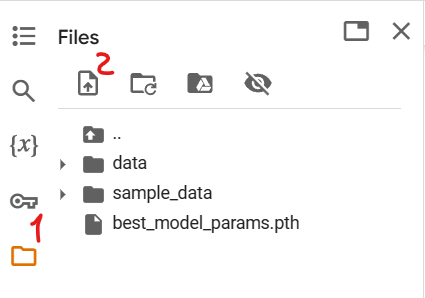

In [ ]:
from PIL import Image
img = Image.open('One.png')
print(f"Ширина и высота {img.size}, количество каналов {len(img.mode)}")
img

Ширина и высота (28, 28), количество каналов 4


**Соответствует ли изображение требованиям?**

Ваш ответ:

Если количество каналов у вас больше одного, то код далее поможет это исправить.

In [ ]:
import torchvision.transforms as transforms
# Раскомментируйте, если у вас цветное изображение
transform_grayscale = transforms.Grayscale()
img = transform_grayscale(img)

# Используем те же преобразования как и при создании датасетов в начале задания
transform_to_tensor = transforms.ToTensor()
x = transform_to_tensor(img)

# Выведите размерности тензора x

#
print(x.size())
# Ваш код
#

torch.Size([1, 28, 28])


Но работа нашей модели строилась с учетом использования пакетов данных (batches), которые создавали экземпляры класса DataLoader, поэтому для использования одного изображения нам надо имитировать пакет из одного изображения. С этим поможет метод тензора `unsqueeze`, а чтобы не создавать отдельную переменную можно воспользоваться методом `unsqueeze_`.

<ipython-input-205-f7ddf670173d>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  random_image_tensor = torch.tensor(random_image).unsqueeze(0)


Предсказанный класс: 5
Фактический класс: 5


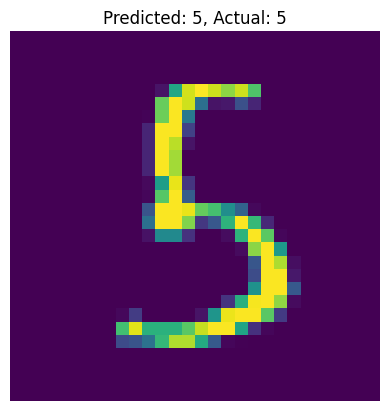

In [ ]:
import random

# Получите случайный индекс из DataLoader
random_index = random.randint(0, len(test_set) - 1)

# Извлеките изображение и метку по этому случайному индексу
random_image, random_label = test_set[random_index]

# Преобразуйте изображение в тензор и добавьте размерность батча
random_image_tensor = torch.tensor(random_image).unsqueeze(0)

# Передайте изображение через модель для получения предсказания
with torch.no_grad():
    model.eval()  # переводим модель в режим оценки
    output = model(random_image_tensor)

# Получите предсказанный класс, а также правильный класс
predicted_class = torch.argmax(output).item()
actual_class = random_label

# Выведите предсказанный и фактический класс
print(f"Предсказанный класс: {predicted_class}")
print(f"Фактический класс: {actual_class}")

# Теперь вы можете сравнить предсказанный класс с фактическим и оценить точность модели.
import matplotlib.pyplot as plt

# Выведем фотографию
plt.imshow(random_image.permute(1, 2, 0))  # Переставляем размерности для корректного отображения изображения
plt.title(f"Predicted: {predicted_class}, Actual: {actual_class}")
plt.axis('off')  # Отключаем оси
plt.show()


In [ ]:
#
x = x.unsqueeze(1)

Изображение подготовлено, теперь необходимо воссоздать модель и загрузить в нее параметры, которые дали наилучший результат при обучении.

In [ ]:
best_model = MLP()
best_model_params = torch.load('best_model_params.pth') # Укажите путь до сохраненного файла
state_dict = best_model_params['model_state_dict']
best_model.load_state_dict(state_dict)
best_model.eval()

MLP(
  (layer_Input): Linear(in_features=784, out_features=200, bias=True)
  (layer_Hidden_1): Linear(in_features=200, out_features=124, bias=True)
  (layer_hidden_2): Linear(in_features=124, out_features=50, bias=True)
  (layer_output): Linear(in_features=50, out_features=10, bias=True)
  (relu): ReLU()
)

Осталось воспользоваться моделью. Передайте на вход модели подготовленный тензор. Из вывода модели получите индекс наибольшего значения (`argmax`) и по индексу получите результат из массива ярлыков классов (`test_set.classes`).

In [ ]:
#
Predict = best_model(x)
index = torch.argmax(Predict)
class_preidct = test_set.classes[index]
print('Предсказанный класс: ', class_preidct)


Предсказанный класс:  0 - zero


**Правильно ли предсказала модель цифру?**

Ваш ответ:

**Лучшая точность на тестовой выборке для вашей модели.**

Ваш ответ:

**Что такое пакет данных (batch)?**

Ваш ответ:

**В чем заключается смысл стохастического градиентного спуска?**

Ваш ответ: